# Enhanced Model Comparison for Sign Language Translation Tasks

This notebook visualizes and compares transformer and generative models discussed in Chapters 4–6 across key criteria including parameter size, input modality, multilinguality, gloss translation, and inference compatibility.


In [1]:
!pip install -q matplotlib seaborn pandas plotly
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import numpy as np


In [2]:
data = {
    "Model": ["T5", "mT5", "FLAN-T5", "UL2", "BART", "mBART-50", "BLIP-2", "SignDiff"],
    "Parameters (M)": [220, 300, 250, 2500, 140, 610, 1000, 150],
    "Gloss-to-Text": [1, 1, 1, 1, 1, 1, 0, 0],
    "Text-to-Gloss": [1, 1, 1, 0, 0, 1, 0, 0],
    "Multilingual": [0, 1, 0, 1, 0, 1, 0, 0],
    "Image Input": [0, 0, 0, 0, 0, 0, 1, 0],
    "Sign Motion": [0, 0, 0, 0, 0, 0, 0, 1],
    "Fine-tuning Required": [1, 1, 0, 0, 0, 0, 0, 1],
    "Colab Friendly": [1, 1, 1, 0, 1, 1, 0, 0]
}
df = pd.DataFrame(data)
df


,Model,Parameters (M),Gloss-to-Text,Text-to-Gloss,Multilingual,Image Input,Sign Motion,Fine-tuning Required,Colab Friendly
0,T5,220,1,1,0,0,0,1,1
1,mT5,300,1,1,1,0,0,1,1
2,FLAN-T5,250,1,1,0,0,0,0,1
3,UL2,2500,1,0,1,0,0,0,0
4,BART,140,1,0,0,0,0,0,1
5,mBART-50,610,1,1,1,0,0,0,1
6,BLIP-2,1000,0,0,0,1,0,0,0
7,SignDiff,150,0,0,0,0,1,1,0


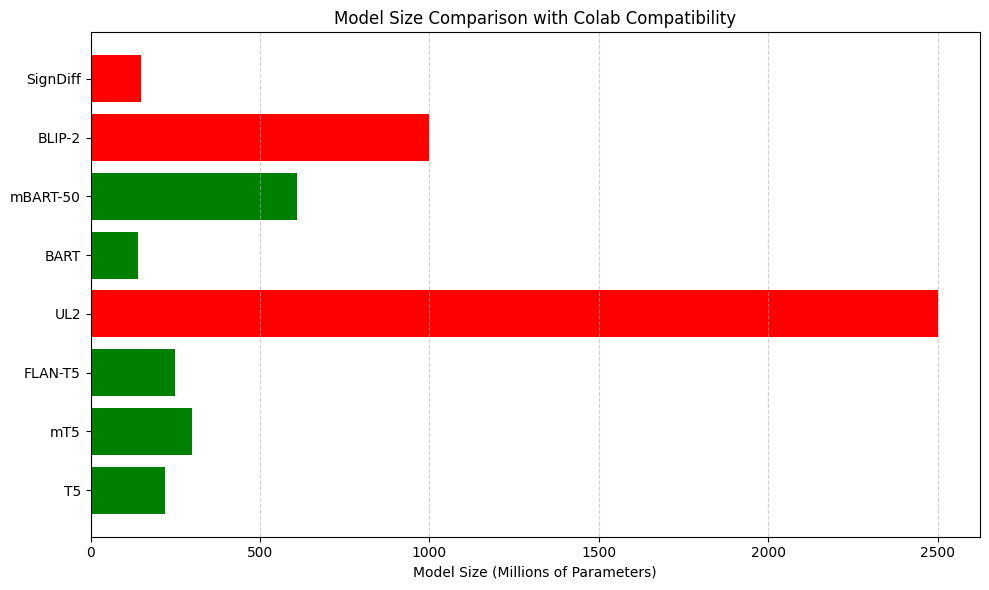

In [3]:
plt.figure(figsize=(10, 6))
colors = ['green' if x else 'red' for x in df["Colab Friendly"]]
plt.barh(df["Model"], df["Parameters (M)"], color=colors)
plt.xlabel("Model Size (Millions of Parameters)")
plt.title("Model Size Comparison with Colab Compatibility")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


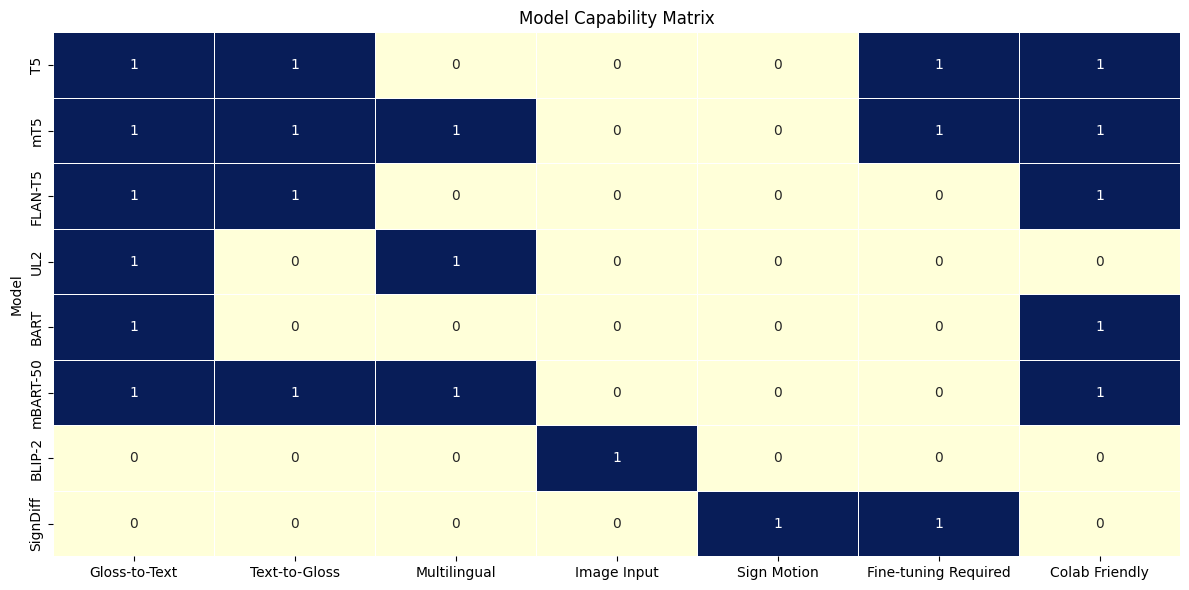

In [4]:
capability_df = df.set_index("Model").iloc[:, 1:8]
plt.figure(figsize=(12, 6))
sns.heatmap(capability_df, annot=True, cmap="YlGnBu", cbar=False, linewidths=0.5)
plt.title("Model Capability Matrix")
plt.tight_layout()
plt.show()


In [5]:
radar_df = pd.DataFrame({
    "Metric": ["Gloss-to-Text", "Text-to-Gloss", "Multilingual", "Image Input", "Sign Motion", "Colab Friendly"],
    "T5": [1, 1, 0, 0, 0, 1],
    "mBART-50": [1, 1, 1, 0, 0, 1],
    "FLAN-T5": [1, 1, 0, 0, 0, 1],
    "BLIP-2": [0, 0, 0, 1, 0, 0]
})

fig = go.Figure()
for model in radar_df.columns[1:]:
    fig.add_trace(go.Scatterpolar(
        r=radar_df[model].tolist(),
        theta=radar_df["Metric"],
        fill='toself',
        name=model
    ))
fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[0, 1])),
    title="Radar Comparison of Top SLT Models",
    showlegend=True
)
fig.show()


## 🔍 Observations

- **T5** and **FLAN-T5** are compact, versatile, and fully Colab-compatible.
- **mBART-50** adds multilingual capability, making it a strong baseline for cross-lingual SLT.
- **BLIP-2** is the only image-conditioned model but requires more compute.
- **SignDiff** is the only model capable of sign motion generation — useful for avatar synthesis, though not Colab-friendly.
